<div style="background-color:#5D73F2; color:#19180F; font-size:40px; font-family:Verdana; padding:10px; border: 5px solid #19180F; border-radius:10px"> Gradient Boosting Machine </div>
<div style="background-color:#A8B4F6; color:#19180F; font-size:30px; font-family:Verdana; padding:10px; border: 5px solid #19180F; border-radius:10px">Overview</div>
<div style="background-color:#D5D9F2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F; border-radius:10px"> 
<b>1. Gradient Boosting Machine (GBM):</b><br>
- GBM is an ensemble learning model that combines multiple weak predictive models (base learners) to create a strong predictive model.<br> 
-Basic learners are trained one by one, new learners focus on correcting mistakes made by previous learners.<br> 
- GBM works by repeatedly fitting a base learner to the residuals (errors) of the previous learner.<br>
– At each iteration, the base learner is trained to predict the negative slope of the loss function with respect to the previous prediction.<br> 
– By adding these new base learners to the ensemble, GBM gradually reduces residuals and improves overall prediction accuracy.<br><br>
Mathematical explanation:<br>
– Given a training dataset containing input features X and a target variable y, GBM aims to find a function F(X) that predicts y. F(X) is the sum of multiple base learner predictions.<br> 
– The prediction of the kth base learner is denoted as h_k(X).<br> 
- GBM minimizes a loss function L(y, F(X)) measuring the difference between the predicted value F(X) and the actual target value y.<br> 
- At each iteration, GBM fits a new base learner h_k(X) to the negative slope of the loss function with respect to the previous prediction: -[∂L(y, F(X))/∂F(X)] .<br> 
- The learning rate (η) determines the contribution of each base learner to the ensemble and helps control the learning rate.<br>
- The final prediction from GBM is obtained by summing the predictions of all base learners: F(X) = h_1(X) + h_2(X) + ... + h_n(X).<br><br>
<b>2. Light Gradient Boosting Machine (LightGBM):</b><br>
- LightGBM is an optimized version of GBM that is faster and more memory efficient.<br> 
- LightGBM uses a technique called gradient-based one-sided sampling (GOSS) to selectively use samples with larger gradients during the training process.<br> 
- GOSS focuses on samples with large gradients as they contribute more to the total loss function and provide more information for learning.<br> 
- LightGBM reduces computation and storage requirements by sampling and prioritizing data points with high gradients, resulting in faster training and better scalability.<br>
Mathematical explanation:<br>
- LightGBM follows a similar process as GBM, but introduces additional optimizations.<br>
 - The GOSS method splits the training data into two subsets. One contains large slope samples (high slope data) and the other contains small slope samples (low slope data).<br> 
 - During the training process, LightGBM uses a smaller percentage of low-gradient data and more of high-gradient data, thus reducing the overall amount of computation.<br> 
 - LightGBM also uses another optimization called Exclusive Feature Bundling (EFB) to group exclusive features to reduce the number of split points considered in tree construction and improve training efficiency.<br>
In brief, GBM and LightGBM work by iteratively training a base learner to correct mistakes made by previous learners. GBM utilizes all training samples, while LightGBM selectively uses larger gradient patterns and incorporates additional optimizations such as exclusive feature bundling to optimize the training process. The final prediction is a combination of the predictions from all base learners, with GBMs and LightGBMs providing accurate and powerful models for various machine learning tasks.
</div>


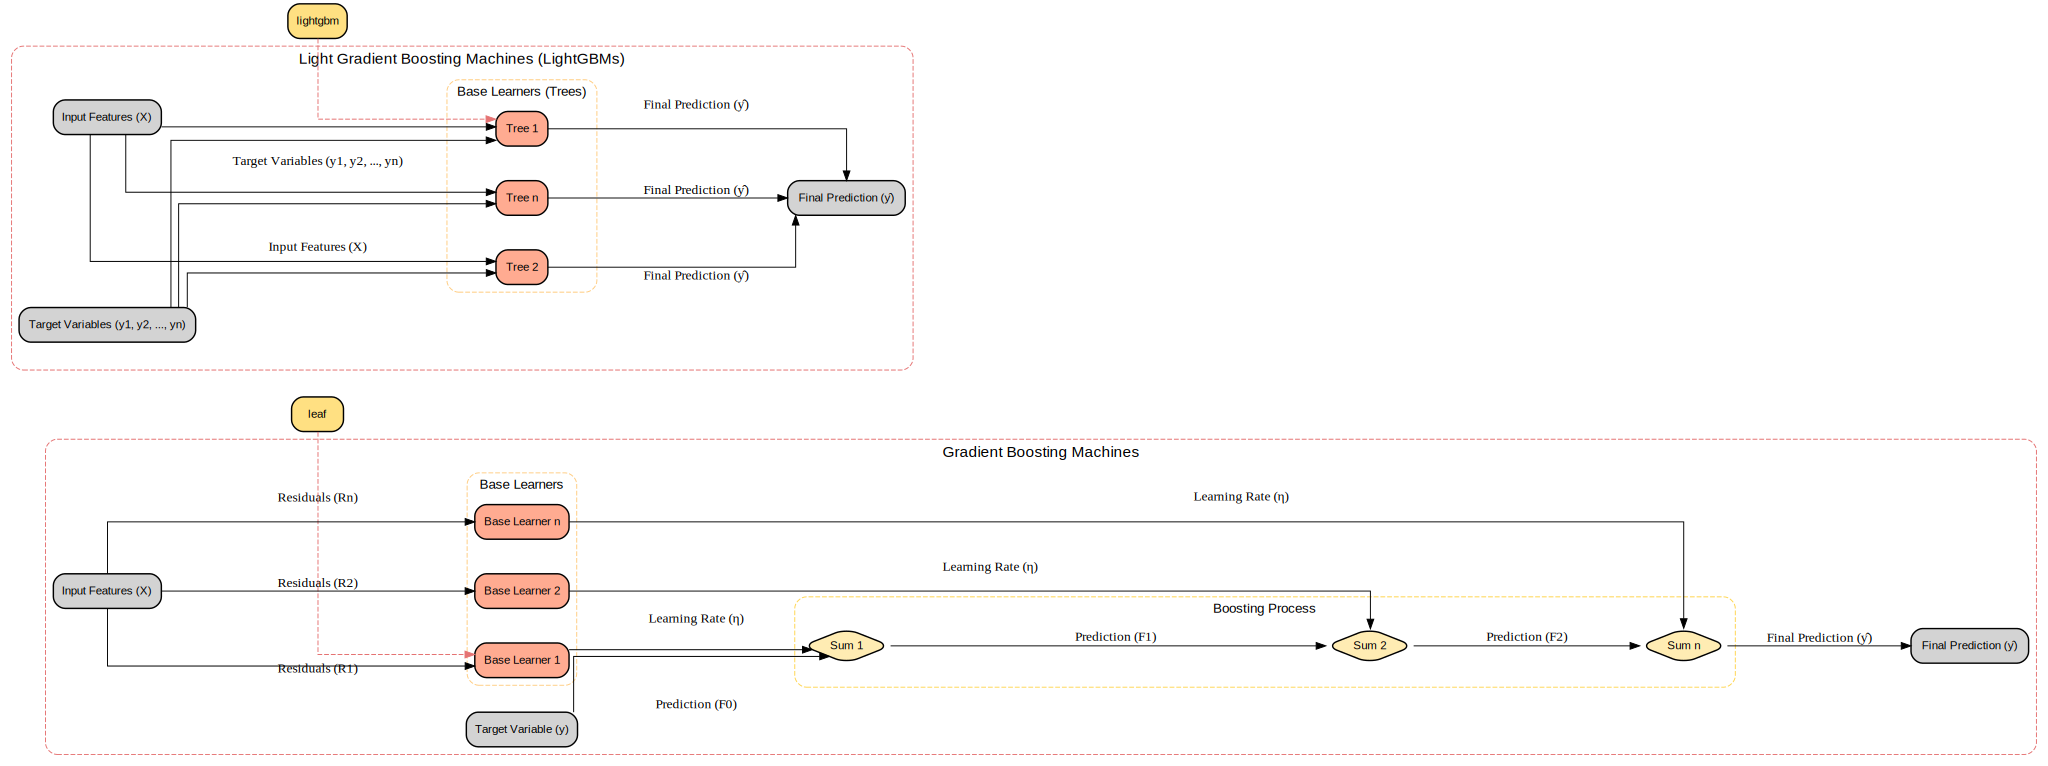

In [1]:
from IPython.display import SVG, display

# Load the SVG file and display it
svg_file = '/kaggle/input/machine-learning-architecture-diagrams/GBM.svg'
display(SVG(filename=svg_file))

<div style="background-color:#D5D9F2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F; border-radius:10px"> 
This architecture is a comparison between a traditional gradient boosting machine (GBM) and a light gradient boosting machine (LightGBM).<br><br>
It consists of his two main components, GBM and LightGBM. Here is the description 
 GBM components:<br>
- Input: Represents the input characteristic (X) and target variable (y) used in GBM.<br>
- Core Learner: Represents an individual core learner within the GBM. Each core learner is called core learner n, through core learner 1, core learner 2, and so on.<br> 
- Boosting Process: Represents the boosting process within the GBM. Each boosting iteration is called total 1, total 2, etc. to total n. The boosting process combines the base learner's predictions and uses the learning rate (η) and residuals (R1, R2, Rn) to adjust the predictions and improve the model's accuracy.<br>
- Output: Represents the final prediction (ŷ) of the GBM.<br>
 LightGBM Components:<br>
- Input: Represents the input characteristics (X) and target variables (y) used by LightGBM.<br>
- Basic learners (trees): Represent individual decision trees in LightGBM. Each decision tree is denoted as tree 1, tree 2, etc. through tree n.<br>
- Output: Represents the final prediction (ŷ) produced by LightGBM.<br>
<br>
- Connections within GBM:<br>
- Input features (X) are connected to each base learner (b1, b2, bn) via residuals (R1, R2, Rn).<br> 
- A target variable (y) is connected to each boosting iteration (sum 1, sum 2, sum n) through the initial predictions (F0, F1, Fn).<br> 
- Each base learner (b1, b2, bn) is connected to its respective boosting iteration (Sum 1, Sum 2, Sum n) through a learning rate (η).<br> 
- The final predictions (1 total, 2 total, n total) from each boosting iteration are connected to the final overall prediction (ŷ).<br>
- Connections within LightGBM:<br>
- The input feature (X) and target variable (y) are separately connected to each decision tree (tree 1, tree 2, tree n).<br>
- Each decision tree (tree 1, tree 2, tree n) is connected to the final prediction (ŷ) of LightGBM.<br></div>

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
For Detailed Case Study, Refer this <a href="https://www.kaggle.com/code/suraj520/pss3-e17-case-study-recommendations-prediction"> notebook </a> </div>


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Importing modules
    </div>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix
import re
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Reading the dataframe    </div>


In [3]:
train_df = pd.read_csv('/kaggle/input/playground-series-s3e17/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s3e17/test.csv')

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Inspecting the columns    </div>


In [4]:
train_df.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Dropping irrelevant columns    </div>


In [5]:
train_df.drop(['id', 'Product ID'], axis=1, inplace=True)
test_df.drop(['id', 'Product ID'], axis=1, inplace=True)

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Inspecting the dataframe    </div>


In [6]:
train_df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
136424,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Creating new features as temperature difference and speed torque    </div>


In [7]:
train_df['Temperature Difference'] = train_df['Process temperature [K]'] - train_df['Air temperature [K]']
test_df['Temperature Difference'] = test_df['Process temperature [K]'] - test_df['Air temperature [K]']

In [8]:
train_df['Speed_Torque'] = train_df['Rotational speed [rpm]'] * train_df['Torque [Nm]']
test_df['Speed_Torque'] = test_df['Rotational speed [rpm]'] * test_df['Torque [Nm]']

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Generating target and input features    </div>


In [9]:
X = train_df.drop(['Machine failure'], axis=1)
y = train_df['Machine failure']

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Creating train and val sets    </div>


In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Creating model dict listing out the models to be fitted    </div>


In [11]:
model_dict = {
    'Gradient Boosting': GradientBoostingClassifier(),
    'LGBM': LGBMClassifier(),
}


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Listing out the numerical and categorical features    </div>


In [12]:
numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Temperature Difference', 'Speed_Torque']
categorical_features = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Type']

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Creating a column transformer to apply different preprocessing steps to numerical and categorical features    </div>


In [13]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Replacing problematic characters in feature names    </div>


In [14]:
def clean_feature_names(feature_names):
    clean_names = []
    for name in feature_names:
        name = re.sub(r'[\[\]<>]', '_', name)
        clean_names.append(name)
    return clean_names


In [15]:
feature_names = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Type_H', 'Type_L', 'Type_M', 'Temperature Difference', 'Speed_Torque']
cleaned_feature_names = clean_feature_names(feature_names)

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Fitting the model over K folds    </div>


In [16]:
# Define the number of folds for k-fold cross-validation
n_folds = 10

# Initialize the k-fold cross-validator
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize a list to store the cross-validation scores
cv_scores = []

# Create a list to store the model names and their corresponding ROC AUC scores
model_names = []
roc_auc_scores = []

# Initialize the best model and its score
best_model = None
best_model_score = 0.0

# Loop over the models
for model_name, model in model_dict.items():
    print(f'Running {model_name}...')

    # Reset the mean CV score for each model
    mean_cv_score = 0.0

    # Loop over the folds
    for fold, (train_index, val_index) in enumerate(kf.split(X_train)):

        print(f'Fold: {fold+1}')

        # Split the data into training and validation sets for this fold
        X_train_fold = X_train.iloc[train_index]
        X_val_fold = X_train.iloc[val_index]
        y_train_fold = y_train.iloc[train_index]
        y_val_fold = y_train.iloc[val_index]

        # Clean the feature names
        cleaned_feature_names = clean_feature_names(X_train_fold.columns)

        if model_name != 'LGBM':
            # Set the cleaned feature names for the model
            model.feature_names = [str(name) for name in cleaned_feature_names]

        # Apply preprocessing to the training data for this fold
        X_train_fold = preprocessor.fit_transform(X_train_fold)
        X_val_fold = preprocessor.transform(X_val_fold)

        # Fit the model on the training data for this fold
        model.fit(X_train_fold, y_train_fold)

        # Evaluate the model on the validation data for this fold
        y_pred_val = model.predict_proba(X_val_fold)[:, 1]
        roc_auc = roc_auc_score(y_val_fold, y_pred_val)
        cv_scores.append(roc_auc)

        # Print the accuracy for this fold
        accuracy = model.score(X_val_fold, y_val_fold)
        print(f'Fold {fold+1} Accuracy:', accuracy)

    # Calculate the mean cross-validation score for the model
    mean_cv_score = np.mean(cv_scores)
    print('Mean CV score:', mean_cv_score)
    
    # Append the model name and ROC AUC score to the lists
    model_names.append(model_name)
    roc_auc_scores.append(mean_cv_score)

    # Check if this model has the best score
    if mean_cv_score > best_model_score:
        best_model_score = mean_cv_score
        best_model = model

Running Gradient Boosting...
Fold: 1
Fold 1 Accuracy: 0.9969766376546038
Fold: 2
Fold 2 Accuracy: 0.9958772331653688
Fold: 3
Fold 3 Accuracy: 0.997159871736143
Fold: 4
Fold 4 Accuracy: 0.9952354773685175
Fold: 5
Fold 5 Accuracy: 0.9962433571559465
Fold: 6
Fold 6 Accuracy: 0.9960601062855049
Fold: 7
Fold 7 Accuracy: 0.9962433571559465
Fold: 8
Fold 8 Accuracy: 0.9953271028037384
Fold: 9
Fold 9 Accuracy: 0.9961517317207257
Fold: 10
Fold 10 Accuracy: 0.994960601062855
Mean CV score: 0.96229197651998
Running LGBM...
Fold: 1
Fold 1 Accuracy: 0.996701786532295
Fold: 2
Fold 2 Accuracy: 0.9955107650022904
Fold: 3
Fold 3 Accuracy: 0.9972514887769125
Fold: 4
Fold 4 Accuracy: 0.9953271028037384
Fold: 5
Fold 5 Accuracy: 0.9964266080263882
Fold: 6
Fold 6 Accuracy: 0.9956019791094007
Fold: 7
Fold 7 Accuracy: 0.9962433571559465
Fold: 8
Fold 8 Accuracy: 0.9950522264980759
Fold: 9
Fold 9 Accuracy: 0.9963349825911673
Fold: 10
Fold 10 Accuracy: 0.994502473886751
Mean CV score: 0.9628094632915554


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Plotting the ROC AUC scores using a bar plot    </div>


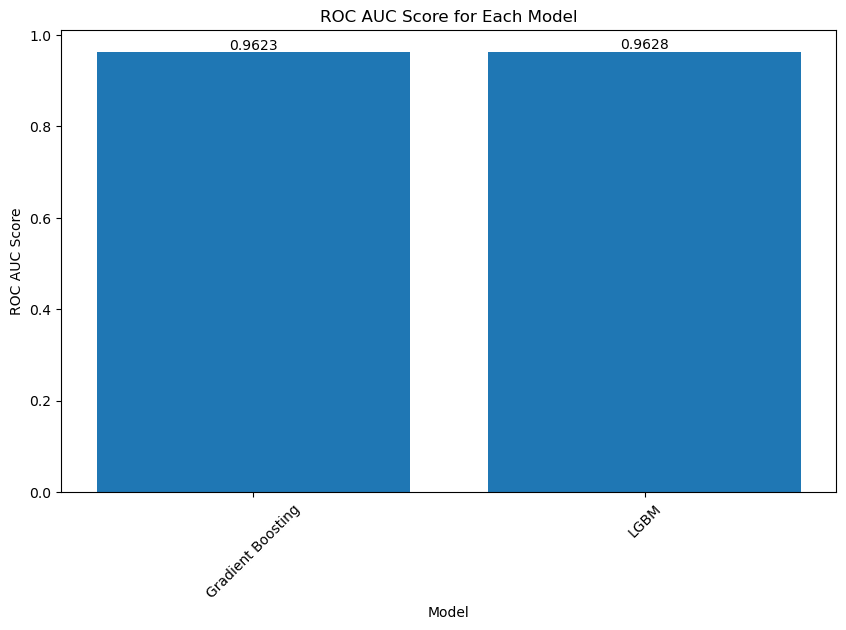

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(model_names, roc_auc_scores)
plt.xlabel('Model')
plt.ylabel('ROC AUC Score')
plt.title('ROC AUC Score for Each Model')

# Display the ROC AUC scores over each bar
for i in range(len(model_names)):
    plt.text(i, roc_auc_scores[i], f'{roc_auc_scores[i]:.4f}', ha='center', va='bottom')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

plt.show()

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Printing out the best model to be tuned    </div>


In [18]:
print("Best model is ",best_model)

Best model is  LGBMClassifier()


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Listing out the param grid which was shortlisted from prior experiments    </div>


In [19]:
# Define the parameter grid for hyperparameter tuning # calculated here : https://www.kaggle.com/code/suraj520/pss3-e17-case-study-recommendations-prediction?scriptVersionId=133511269&cellId=52
param_grid = {
    'num_leaves': [15],
    'max_depth': [3],
    'learning_rate': [0.1],
    'n_estimators': [100],
    'reg_alpha': [0.5],
    'reg_lambda': [0.0]
}

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Tuning the model over K folds    </div>


In [20]:
#preprocessing the train set using preprocessor
preprocessor.fit(X_train)

X_train_preprocessed = preprocessor.transform(X_train)

# Initialize the LGBMClassifier
lgbm = LGBMClassifier()

# Initialize the GridSearchCV
grid_search = GridSearchCV(lgbm, param_grid, cv=10, scoring='roc_auc')

# Fit the GridSearchCV on the training data
grid_search.fit(X_train_preprocessed, y_train)

# Get the best estimator and its corresponding score
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

# Print the best hyperparameters and the corresponding score
print('Best Hyperparameters:', grid_search.best_params_)
print('Best Score:', best_score)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'num_leaves': 15, 'reg_alpha': 0.5, 'reg_lambda': 0.0}
Best Score: 0.965436015680447


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Defining preprocessor for test set    </div>


In [21]:
numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Temperature Difference', 'Speed_Torque']
categorical_features = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Type']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Passing the test set through preprocessor    </div>


In [22]:
X_test = preprocessor.fit_transform(test_df)
X_test = preprocessor.transform(test_df)

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Making predictions using best model    </div>


In [23]:
predictions = best_model.predict_proba(X_test)[:, 1]

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Generating submission    </div>


In [24]:
test_data = pd.read_csv('/kaggle/input/playground-series-s3e17/test.csv')
submission_data = pd.DataFrame({
    'id': test_data['id'],
    'Machine failure': predictions
})

In [25]:
#generating submission
submission_data.to_csv('submission.csv', index=False)

In [26]:
submission_data

,id,Machine failure
0,136429,0.001492
1,136430,0.002546
2,136431,0.001049
3,136432,0.001511
4,136433,0.001134
...,...,...
90949,227378,0.001441
90950,227379,0.000456
90951,227380,0.001065
90952,227381,0.000762
